## Pré Processamento de Dados

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
current_dir = os.getcwd()
print(f"Diretório de trabalho atual: {current_dir}")

caminho_relativo = r'..\..\data\Airlines.csv'

if os.path.exists(caminho_relativo):
    dados = pd.read_csv(caminho_relativo, index_col='id')
    print(dados.head())
else:
    print(f"Arquivo não encontrado: {caminho_relativo}")

Diretório de trabalho atual: c:\Users\herbe\Desktop\JaPodeVoar-main\app\models
   Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
id                                                                      
1       CO     269         SFO       IAH          3    15     205      1
2       US    1558         PHX       CLT          3    15     222      1
3       AA    2400         LAX       DFW          3    20     165      1
4       AA    2466         SFO       DFW          3    20     195      1
5       AS     108         ANC       SEA          3    30     202      0


In [5]:
# Número de linhas e colunas
dados.shape

(539383, 8)

In [6]:
# Verifica a estrutura do dataframe, incluindo a contagem de valores não nulos e os tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539383 entries, 1 to 539383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 37.0+ MB


In [7]:
# Resumos estatisticos
dados[['Time', 'Length']].describe()

,Time,Length
count,539383.000000,539383.000000
mean,802.728963,132.202007
std,278.045911,70.117016
min,10.000000,0.000000
25%,565.000000,81.000000
50%,795.000000,115.000000
75%,1035.000000,162.000000
max,1439.000000,655.000000


In [8]:
data = dados;

In [9]:
def zero_length(data):
  zero_length = data[data['Length'] == 0]
  if not zero_length.empty:
    print("The Length column contains values equal to zero:")
    print(zero_length)
  else:
    print("The Length column does not contain values equal to zero.")
    data = zero_length



zero_length(data)

The Length column contains values equal to zero:
       Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
id                                                                          
179150      F9     106         DEN       MSP          6   635       0      0
182841      F9     107         MSP       DEN          6   851       0      0
188954      F9     103         MSP       DEN          7   375       0      0
445579      B6     493         BOS       SEA          7  1060       0      1


In [10]:
# Remove zero values from the Length column before removing outliers
data_no_zero = data[data['Length'] != 0]

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = data_no_zero['Length'].quantile(0.25)
Q3 = data_no_zero['Length'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data by removing outliers
data_cleaned = data_no_zero[(data_no_zero['Length'] >= lower_bound) & (data_no_zero['Length'] <= upper_bound)]

zero_length(data_cleaned)

The Length column does not contain values equal to zero.


In [11]:
# Verifique o min novamente
dados[['Length']].describe()

,Length
count,539383.000000
mean,132.202007
std,70.117016
min,0.000000
25%,81.000000
50%,115.000000
75%,162.000000
max,655.000000


In [12]:
# Exibe os tipos de dados de cada coluna
dados.dtypes

Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [13]:
# Verifica a quantidade de valores nulos por coluna
dados.isnull().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [14]:
dados['Delay'].unique()

array([1, 0])

In [15]:
dados['Airline'].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [16]:
dados['AirportFrom'].unique()

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

In [17]:
print("Quantidade de companhias aéreas distintas:", len(dados['Airline'].unique()))
print("Quantidade de modelos de aviões distintos:", len(dados['Flight'].unique()))
print("Quantidade de aeroportos distintos (origem):", len(dados['AirportFrom'].unique()))
print("Quantidade de aeroportos distintos (destino):", len(dados['AirportTo'].unique()))
print("Quantidade total de voos:", len(dados))


Quantidade de companhias aéreas distintas: 18
Quantidade de modelos de aviões distintos: 6585
Quantidade de aeroportos distintos (origem): 293
Quantidade de aeroportos distintos (destino): 293
Quantidade total de voos: 539383


In [18]:
# Verificar balanceamento de classe
for col in ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']:
  print(f"Value counts for {col}:")
  print(dados[col].value_counts())
  print("\n")

Value counts for Airline:
Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64


Value counts for Flight:
Flight
16      420
5       407
9       401
8       396
62      364
       ... 
5131      1
5559      1
3349      1
3413      1
3184      1
Name: count, Length: 6585, dtype: int64


Value counts for AirportFrom:
AirportFrom
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64


Value counts for AirportTo:
AirportTo
ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64


Value counts for DayOfWeek:
DayOfWeek
4    91445
3    89746
5    852

In [32]:
# classes majoritária e minoritária
class_maj = data_cleaned[data_cleaned['Delay'] == 0]
class_min = data_cleaned[data_cleaned['Delay'] == 1]

class_maj_subamostrada = class_maj.sample(len(class_min), random_state=42)

dados_balanceados = pd.concat([class_maj_subamostrada, class_min])

dados_balanceados = dados_balanceados.sample(frac=1, random_state=42).reset_index(drop=True)

dados_balanceados['Delay'].value_counts()

Delay
0    228164
1    228164
Name: count, dtype: int64

In [ ]:
dados_balanceados.shape

(456328, 8)

# Vizualizações graficas dos dados


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Numero de voos por Companhias aéreas





<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_4024\3521049138.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Vooscompanhias.png')


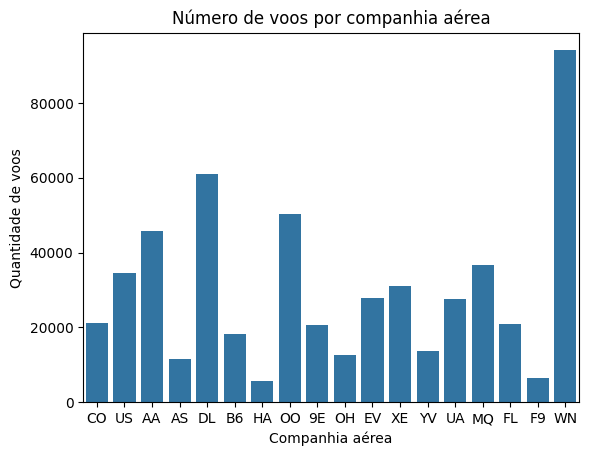

In [ ]:
# Companhias aéreas
sns.countplot(x='Airline', data=dados)
plt.xlabel('Companhia aérea')
plt.ylabel('Quantidade de voos')
plt.title('Número de voos por companhia aérea')
plt.savefig('..\static\image\graficos\Vooscompanhias.png')
plt.show()



## Número de voos por dia da semana


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_4024\659446494.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Voossemana.png')


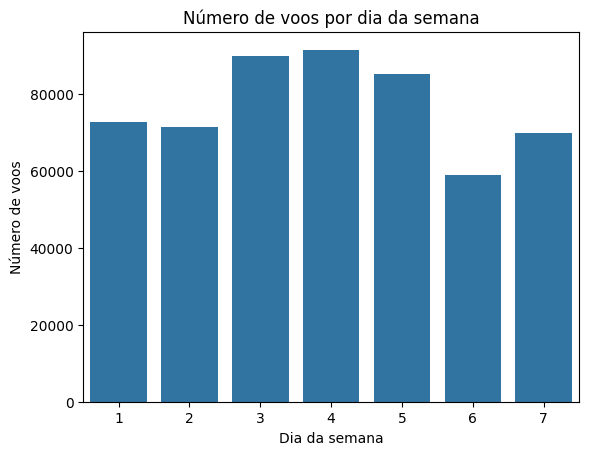

In [ ]:
# Número de voos por dia da semana
sns.countplot(data=dados, x='DayOfWeek')
plt.title('Número de voos por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de voos')
plt.savefig('..\static\image\graficos\Voossemana.png')
plt.show()


## Quantidade de atraso de voos

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_4024\4191557567.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Voosatrasados.png')


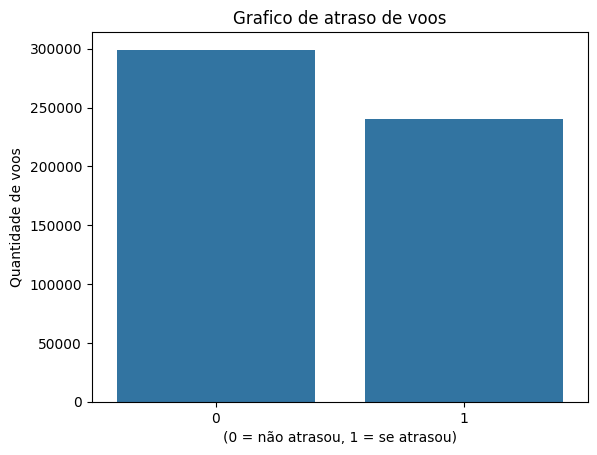

Quantidade de voos que se atrasaram: 240264


In [ ]:
# Quantidade de atrasos
sns.countplot(x = 'Delay', data = dados)
plt.title('Grafico de atraso de voos')
plt.xlabel('(0 = não atrasou, 1 = se atrasou)')
plt.ylabel('Quantidade de voos')
plt.savefig('..\static\image\graficos\Voosatrasados.png')
plt.show()

quantidade_atrasos = dados[dados['Delay'] == 1].shape[0]
print(f"Quantidade de voos que se atrasaram: {quantidade_atrasos}")


## Atraso por Companhia Aérea (Delay vs Airline)




<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_4024\2638569002.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Atrasoscompanhia.png')


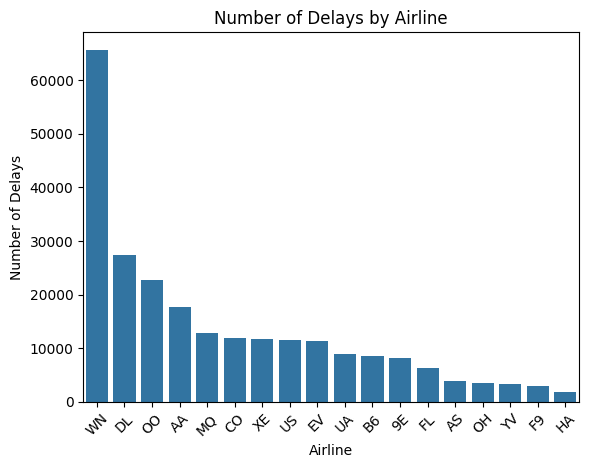

Companhia aérea com mais atrasos: WN com 65657 atrasos.


In [ ]:
# Filtra os dados para incluir apenas os voos atrasados
atrasos = dados[dados['Delay'] == 1]

# Calcula a média de atrasos por companhia aérea
media_atrasos = atrasos['Airline'].value_counts().reset_index()
media_atrasos.columns = ['Airline', 'Number of Delays']

# Encontra a companhia aérea com mais atrasos
companhia_mais_atrasada = media_atrasos.loc[media_atrasos['Number of Delays'].idxmax()]

sns.barplot(x='Airline', y='Number of Delays', data=media_atrasos)
plt.title('Número de Atrasos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Atrasos')
plt.xticks(rotation=45)
plt.savefig('..\static\image\graficos\Atrasoscompanhia.png')
plt.show()

# Mostra a companhia aérea que mais se atrasou
print(f"Companhia aérea com mais atrasos: {companhia_mais_atrasada['Airline']} com {companhia_mais_atrasada['Number of Delays']} atrasos.")


<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_16164\169415051.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\DelaysByAirlineAndTime.png')
C:\Users\herbe\AppData\Local\Temp\ipykernel_16164\169415051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['Time_hours'] = delays['Time'] / 60


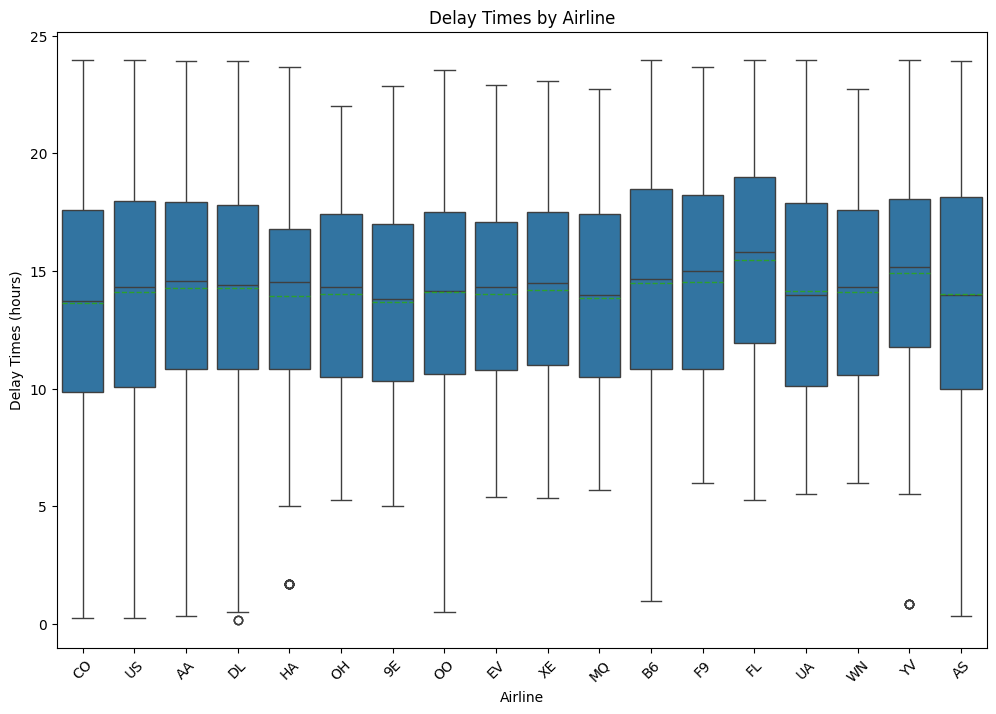

Insights for CO:
  Median delay time: 13.73 hours
  Mean delay time: 13.66 hours
  Minimum delay time: 0.25 hours
  Maximum delay time: 23.98 hours
  First quartile (Q1): 9.83 hours
  Third quartile (Q3): 17.58 hours
  Interquartile range (IQR): 7.75 hours
  Number of outliers: 0

Insights for US:
  Median delay time: 14.33 hours
  Mean delay time: 14.09 hours
  Minimum delay time: 0.25 hours
  Maximum delay time: 23.98 hours
  First quartile (Q1): 10.08 hours
  Third quartile (Q3): 17.98 hours
  Interquartile range (IQR): 7.90 hours
  Number of outliers: 0

Insights for AA:
  Median delay time: 14.58 hours
  Mean delay time: 14.29 hours
  Minimum delay time: 0.33 hours
  Maximum delay time: 23.92 hours
  First quartile (Q1): 10.83 hours
  Third quartile (Q3): 17.92 hours
  Interquartile range (IQR): 7.08 hours
  Number of outliers: 0

Insights for DL:
  Median delay time: 14.42 hours
  Mean delay time: 14.30 hours
  Minimum delay time: 0.17 hours
  Maximum delay time: 23.92 hours
  Fi

In [29]:
# Filtra os dados para incluir apenas os voos atrasados
delays = data[data['Delay'] == 1]

# Transformar a coluna Time de minutos para horas
delays['Time_hours'] = delays['Time'] / 60

# Criar um boxplot para visualizar os horários dos atrasos por companhia aérea
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Time_hours', data=delays, showmeans=True, meanline=True)
plt.title('Delay Times by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Times (hours)')
plt.xticks(rotation=45)
plt.savefig('..\static\image\graficos\DelaysByAirlineAndTime.png')
plt.show()

# Analisar os insights dos dados
for airline in delays['Airline'].unique():
    airline_data = delays[delays['Airline'] == airline]
    median_delay = airline_data['Time_hours'].median()
    mean_delay = airline_data['Time_hours'].mean()
    min_delay = airline_data['Time_hours'].min()
    max_delay = airline_data['Time_hours'].max()
    q1 = airline_data['Time_hours'].quantile(0.25)
    q3 = airline_data['Time_hours'].quantile(0.75)
    iqr = q3 - q1
    outliers = airline_data[(airline_data['Time_hours'] < (q1 - 1.5 * iqr)) | (airline_data['Time_hours'] > (q3 + 1.5 * iqr))]

    print(f"Insights for {airline}:")
    print(f"  Median delay time: {median_delay:.2f} hours")
    print(f"  Mean delay time: {mean_delay:.2f} hours")
    print(f"  Minimum delay time: {min_delay:.2f} hours")
    print(f"  Maximum delay time: {max_delay:.2f} hours")
    print(f"  First quartile (Q1): {q1:.2f} hours")
    print(f"  Third quartile (Q3): {q3:.2f} hours")
    print(f"  Interquartile range (IQR): {iqr:.2f} hours")
    print(f"  Number of outliers: {len(outliers)}")
    print()

## Voos Atrasados por Dia da Semana (Delay vs DayOfWeek)


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_4024\1320522279.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Voosatrasadossemana.png')


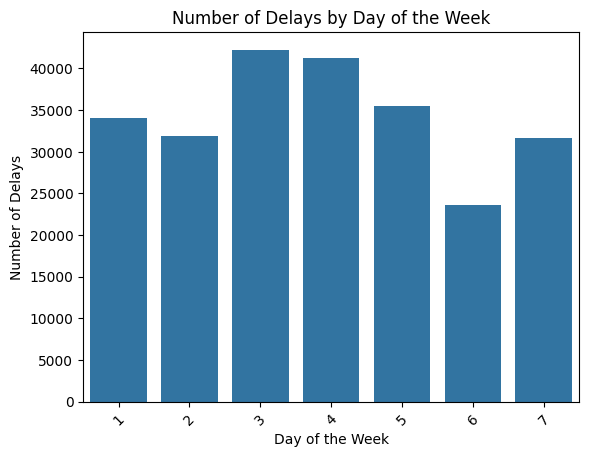

Dia da semana com mais atrasos: Terça com 42254 atrasos.


In [ ]:
# Filtra os dados para incluir apenas os voos atrasados
atrasos = dados[dados['Delay'] == 1]

# Calcula o número de atrasos por dia da semana
media_atrasos = atrasos['DayOfWeek'].value_counts().reset_index()
media_atrasos.columns = ['DayOfWeek', 'NumberDelays']

# Encontra o dia da semana com mais atrasos
dia_mais_atrasado = media_atrasos.loc[media_atrasos['NumberDelays'].idxmax()]

# Dicionário para mapear números para nomes dos dias
dias_da_semana = {
    1: "Domingo",
    2: "Segunda",
    3: "Terça",
    4: "Quarta",
    5: "Quinta",
    6: "Sexta",
    7: "Sábado"
}

sns.barplot(x='DayOfWeek', y='NumberDelays', data=media_atrasos)
plt.title('Number of Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.savefig('..\static\image\graficos\Voosatrasadossemana.png')
plt.show()

# Mostra o dia da semana com mais atrasos usando o dicionário
dia_nome = dias_da_semana[dia_mais_atrasado['DayOfWeek']]
print(f"Dia da semana com mais atrasos: {dia_nome} com {dia_mais_atrasado['NumberDelays']} atrasos.")


## Duração do Voo por Companhia Aérea (Flight Length vs Airline):



<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_4024\1304249063.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Duracaovooporcompanhia.png')


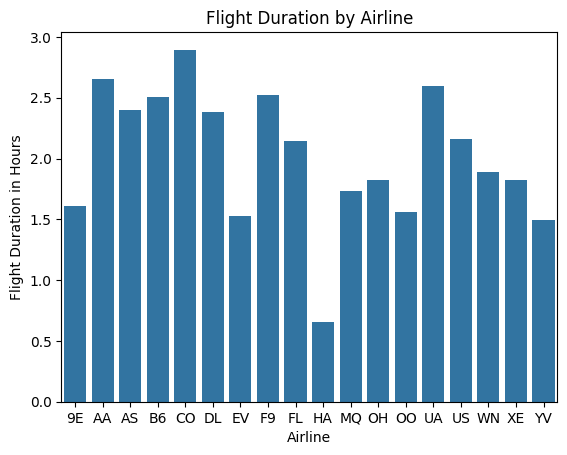

Companhia aérea: 9E, Duração média do voo: 1 horas e 36 minutos.
Companhia aérea: AA, Duração média do voo: 2 horas e 39 minutos.
Companhia aérea: AS, Duração média do voo: 2 horas e 23 minutos.
Companhia aérea: B6, Duração média do voo: 2 horas e 30 minutos.
Companhia aérea: CO, Duração média do voo: 2 horas e 53 minutos.
Companhia aérea: DL, Duração média do voo: 2 horas e 23 minutos.
Companhia aérea: EV, Duração média do voo: 1 horas e 31 minutos.
Companhia aérea: F9, Duração média do voo: 2 horas e 31 minutos.
Companhia aérea: FL, Duração média do voo: 2 horas e 8 minutos.
Companhia aérea: HA, Duração média do voo: 0 horas e 39 minutos.
Companhia aérea: MQ, Duração média do voo: 1 horas e 44 minutos.
Companhia aérea: OH, Duração média do voo: 1 horas e 49 minutos.
Companhia aérea: OO, Duração média do voo: 1 horas e 33 minutos.
Companhia aérea: UA, Duração média do voo: 2 horas e 35 minutos.
Companhia aérea: US, Duração média do voo: 2 horas e 9 minutos.
Companhia aérea: WN, Duraçã

In [ ]:
# Duração em horas
dados_balanceados['Length_horas'] = dados_balanceados['Length'] / 60

average_delay = dados_balanceados.groupby('Airline')['Length_horas'].mean().reset_index()
sns.barplot(x='Airline', y='Length_horas', data=average_delay)
plt.title('Flight Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Duration in Hours')
plt.savefig('..\static\image\graficos\Duracaovooporcompanhia.png')
plt.show()
for index, row in average_delay.iterrows():
    horas_inteiras = int(row['Length_horas'])
    minutos = int((row['Length_horas'] - horas_inteiras) * 60)
    print(f"Companhia aérea: {row['Airline']}, Duração média do voo: {horas_inteiras} horas e {minutos} minutos.")


In [ ]:
# A coluna Length_horas foi criada para análise, mas não será usada no modelo de machine learning
dados_balanceados = dados_balanceados.drop(columns=['Length_horas'])
print(dados.head())

   Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
id                                                                      
1       CO     269         SFO       IAH          3    15     205      1
2       US    1558         PHX       CLT          3    15     222      1
3       AA    2400         LAX       DFW          3    20     165      1
4       AA    2466         SFO       DFW          3    20     195      1
5       AS     108         ANC       SEA          3    30     202      0


In [ ]:
if not os.path.exists('data'):
    os.makedirs('data')

# Salvar o DataFrame como um arquivo CSV na pasta 'data'
dados_balanceados.to_csv('../../data/dados_balanceados.csv', index=False)

# Exibir uma mensagem confirmando que o arquivo foi salvo
print("Arquivo salvo como 'data/dados_balanceados.csv'")

Arquivo salvo como 'data/dados_balanceados.csv'


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\herbe\AppData\Local\Temp\ipykernel_4024\1969030848.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('..\static\image\graficos\Heartmap.png')


   Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0       12    6663           79         93          1   730     173      0
1        6    5593           16        135          3  1155     146      1
2       12    4826           99        260          1   375     150      1
3        6    5355          289         85          1  1056     127      0
4        4     732          134        158          3  1135     193      1


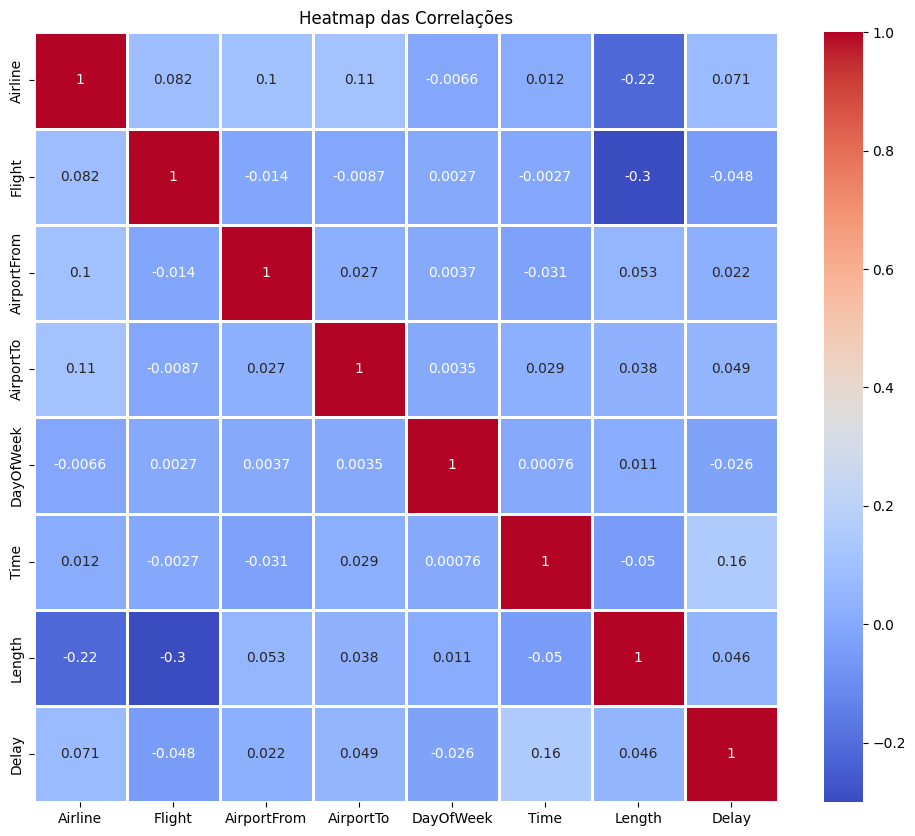

In [ ]:
from sklearn.preprocessing import LabelEncoder


le_airline = LabelEncoder()
le_airportfrom = LabelEncoder()
le_airportto = LabelEncoder()

dados_balanceados['Airline'] = le_airline.fit_transform(dados_balanceados['Airline'])
dados_balanceados['AirportFrom'] = le_airportfrom.fit_transform(dados_balanceados['AirportFrom'])
dados_balanceados['AirportTo'] = le_airportto.fit_transform(dados_balanceados['AirportTo'])

print(dados_balanceados.head())

matriz_correlacao = dados_balanceados.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=.8)
plt.title('Heatmap das Correlações')
plt.savefig('..\static\image\graficos\Heartmap.png')
plt.show()